In [6]:
import pandas as pd
import csv
import json
import numpy as np
from census import Census
import requests
from us import states
from api_key import weather_key
import matplotlib.pyplot as plt
import scipy.stats as sts

In [7]:
#call in the 2019 US accident csv
file_path = '../final_accident.csv'
final_accident_df = pd.read_csv(file_path)

#pull california accidents out of 2019 US Accident
ca_totals = final_accident_df[final_accident_df.State == 'CA']

#find california city with the most accidents
ca_city = ca_totals['City'].value_counts()
ca_city

Los Angeles                  19668
Sacramento                    8541
San Diego                     6217
San Jose                      5355
Oakland                       3764
                             ...  
Korbel                           1
San Fernando Valley              1
Madeline                         1
Twain Harte-Tuolumne City        1
Madeline Plains                  1
Name: City, Length: 1027, dtype: int64

In [8]:
ca_la = ca_totals[ca_totals.City == 'Los Angeles']
ca_la_accidents = ca_la['Date'].count()
ca_la_accidents

19668

<ipython-input-9-bedd9af6d253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_la['Precipitation(in)'] = ca_la['Precipitation(in)'].fillna(0)


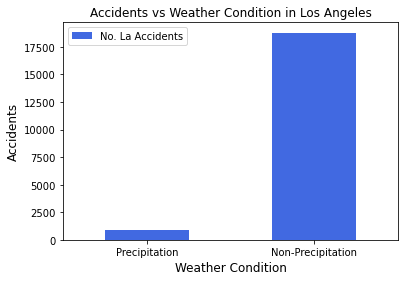

In [9]:
#2019 los Angeles, CA total accidents wet/dry bar graph
ca_la['Precipitation(in)'] = ca_la['Precipitation(in)'].fillna(0)
precip = ca_la['Precipitation(in)'] > 0
precip_wet = ca_la[precip]['Date'].count()
no_precip = ca_la['Precipitation(in)'] == 0
precip_dry = ca_la[no_precip]['Date'].count()
df = pd.DataFrame({'Weather Condition':['Precipitation', 'Non-Precipitation'],'No. La Accidents':[precip_wet,precip_dry]})
ax = df.plot.bar(x='Weather Condition', y='No. La Accidents', rot=0, title = 'Accidents vs Weather Condition in Los Angeles', color = 'royalblue')
ax.set_ylabel('Accidents', size=12)
ax.set_xlabel('Weather Condition', size=12)
plt.show()

In [10]:
total_precip_days = 34
total_dry_days = 331

precip_expected = (total_precip_days / 365) * ca_la_accidents
no_precip_expected = (total_dry_days / 365) * ca_la_accidents

In [11]:
#Chi_square test on 2019 US Accidents
observed = pd.Series([precip_wet, precip_dry], index=['Precipitation','Non-Precipitation'])
df = pd.DataFrame([observed]).T
df[1] = 0
df.columns = ['observed','expected']
df.loc['Precipitation','expected'] = round(precip_expected,2)
df.loc['Non-Precipitation','expected'] = round(no_precip_expected,2)
df.head()
critical_value = sts.chi2.ppf(q=0.95, df = 1)
critical_value
sts.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=545.599709660983, pvalue=1.1408774584757602e-120)

In [12]:
df

,observed,expected
Precipitation,880,1832.09
Non-Precipitation,18788,17835.91


In [13]:
critical_value

3.841458820694124

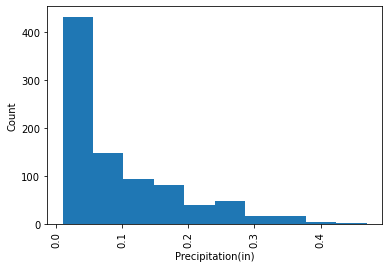

Mean: 0.09240909090909091
Median: 0.06
Mode: 0    0.01
dtype: float64


In [16]:
#turn precip column into series for hist
precipitation_la = ca_la[ca_la["Precipitation(in)"] > 0]
# len(precipitation)

#reset variable for hist. based on new df
precip_hist = precipitation_la['Precipitation(in)']

#determine hist of precip
plt.hist(precip_hist)
plt.xlabel('Precipitation(in)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#determine measures of data
mean = precipitation_la['Precipitation(in)'].mean()
median = precipitation_la['Precipitation(in)'].median()
mode = precipitation_la['Precipitation(in)'].mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

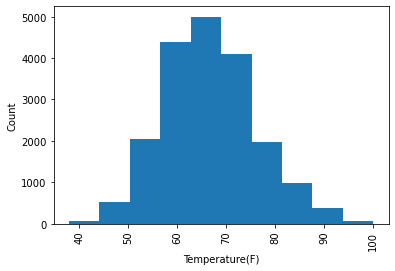

Mean: 66.53575742067554
Median: 66.0
Mode: 0    63.0
dtype: float64


In [17]:
#turn precip column into series for hist
temp = ca_la[ca_la["Temperature(F)"] > 0]

#reset variable for hist. based on new df
temp_hist = temp['Temperature(F)']

#determine hist of precip
plt.hist(temp_hist)
plt.xlabel('Temperature(F)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#determine measures of data
mean = temp['Temperature(F)'].mean()
median = temp['Temperature(F)'].median()
mode = temp['Temperature(F)'].mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

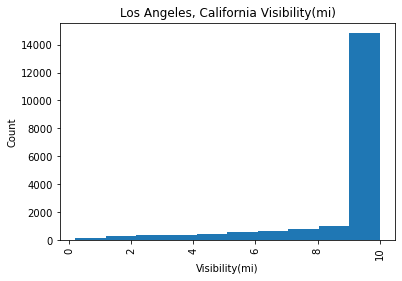

Mean: 9.080493479928407
Median: 10.0
Mode: 0    10.0
dtype: float64


In [24]:
#turn precip column into series for hist
vis = ca_la[ca_la["Visibility(mi)"] > 0]

#reset variable for hist. based on new df
vis_hist = vis['Visibility(mi)']

#determine hist of precip
plt.hist(vis_hist)
plt.xlabel('Visibility(mi)')
plt.ylabel('Count')
plt.title("Los Angeles, California Visibility(mi)")
plt.xticks(rotation=90)
plt.show()

#determine measures of data
mean = vis['Visibility(mi)'].mean()
median = vis['Visibility(mi)'].median()
mode = vis['Visibility(mi)'].mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

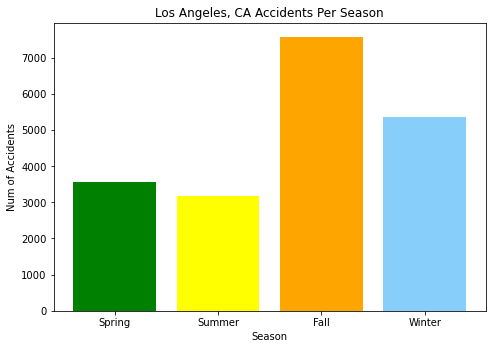

In [21]:
la_spring_dates_df = ca_la[(ca_la['Date'] >= '2019-03-01') & (ca_la['Date'] <= '2019-05-31')]
la_summer_dates_df = ca_la[(ca_la['Date'] >= '2019-06-01') & (ca_la['Date'] <= '2019-08-31')]
la_fall_dates_df = ca_la[(ca_la['Date'] >= '2019-09-01') & (ca_la['Date'] <= '2019-11-31')]
la_winter_dates_1 = ca_la[(ca_la['Date'] >= '2019-12-01') & (ca_la['Date'] <= '2019-12-31')]
la_winter_dates_2 = ca_la[(ca_la['Date'] >= '2019-01-01') & (ca_la['Date'] <= '2019-02-28')]
la_winter = la_winter_dates_1.append(la_winter_dates_2)
la_winter = la_winter.sort_values(by='Date', ascending=True)
la_spring_total = la_spring_dates_df['Date'].count()
la_summer_total = la_summer_dates_df['Date'].count()
la_fall_total = la_fall_dates_df['Date'].count()
la_winter_total = la_winter['Date'].count()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [la_spring_total, la_summer_total, la_fall_total, la_winter_total]
colors = ['green', 'yellow', 'orange', 'lightskyblue']
plt.title('Los Angeles, CA Accidents Per Season')
plt.xlabel('Season')
plt.ylabel('Num of Accidents')
ax.bar(label,totals, color = colors)
plt.show()

<ipython-input-23-f1106e479237>:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(totals, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)


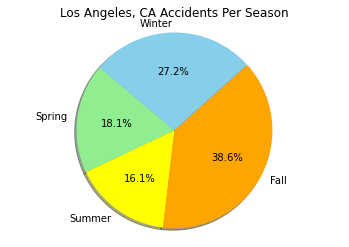

<Figure size 720x720 with 0 Axes>

In [23]:
la_spring_total = la_spring_dates_df['Date'].count()
la_summer_total = la_summer_dates_df['Date'].count()
la_fall_total = la_fall_dates_df['Date'].count()
la_winter_total = la_winter['Date'].count()
la_winter_pct = (la_winter_total / ca_la_accidents) * 100
la_spring_pct = (la_spring_total / ca_la_accidents) * 100
la_summer_pct = (la_summer_total / ca_la_accidents) * 100
la_fall_pct = (la_fall_total / ca_la_accidents) * 100

labels = ['Spring', 'Summer', 'Fall', 'Winter']
accident_percents = [la_spring_pct, la_summer_pct, la_fall_pct, la_winter_pct]

label = [labels]
totals = [accident_percents]
colors = ["lightgreen", "yellow", "orange", "skyblue"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(totals, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('Los Angeles, CA Accidents Per Season')
#print the final product to the screen
fig = plt.figure(figsize=(10,10))
plt.savefig('../../ca_pie.png')
plt.show()